# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Add the URl for weather and API key with response call
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

response = requests.get(url, params ={
    'appid': weather_api_key,
    'q': cities[0],
    'units': 'imperial'
})

response.json()

{'coord': {'lon': 20.13, 'lat': 54.67},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 41,
  'feels_like': 34.16,
  'temp_min': 41,
  'temp_max': 41,
  'pressure': 1025,
  'humidity': 80},
 'visibility': 10000,
 'wind': {'speed': 6.71, 'deg': 210},
 'clouds': {'all': 94},
 'dt': 1584475467,
 'sys': {'type': 1,
  'id': 8934,
  'country': 'RU',
  'sunrise': 1584420523,
  'sunset': 1584463609},
 'timezone': 7200,
 'id': 485660,
 'name': 'Tsimmerbude',
 'cod': 200}

In [4]:
# Create a lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Tsimmerbude
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=svetlyy
Processing Record 2 | Butaritari
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=butaritari
Processing Record 3 | Puerto Ayora
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=puerto ayora
Processing Record 4 | Cabo San Lucas
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=cabo san lucas
Processing Record 5 | Namatanai
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=namatanai
Processing Record 6 | Punta Arenas
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=punta arenas
Processing Record 7 | Doha
https://api.open

Processing Record 56 | Haines Junction
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=haines junction
Processing Record 57 | Mataura
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=mataura
Processing Record 58 | Dikson
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=dikson
Processing Record 59 | Padang
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=padang
Processing Record 60 | Nikolskoye
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=nikolskoye
Processing Record 61 | Sri Aman
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=sri aman
Processing Record 62 | Saint Paul Harbor
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866

Processing Record 112 | Kaitong
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=kaitong
Processing Record 113 | Caxito
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=caxito
Processing Record 114 | Henties Bay
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=henties bay
Processing Record 115 | Taoudenni
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=taoudenni
Processing Record 116 | Nampula
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=nampula
City not found. Skipping...
City not found. Skipping...
Processing Record 117 | Solnechnyy
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=solnechnyy
Processing Record 118 | Sittwe
https://api.openweathermap.org/da

Processing Record 167 | Iqaluit
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=iqaluit
Processing Record 168 | Klungkung
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=klungkung
Processing Record 169 | Alofi
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=alofi
Processing Record 170 | Ixtapa
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=ixtapa
Processing Record 171 | Vaitape
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=vaitape
Processing Record 172 | Cape Coast
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=cape coast
Processing Record 173 | San Antonio
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7

Processing Record 221 | Klaksvík
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=klaksvik
Processing Record 222 | Pimentel
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=pimentel
City not found. Skipping...
City not found. Skipping...
Processing Record 223 | Turka
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=turka
Processing Record 224 | Hamilton
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=hamilton
Processing Record 225 | Vallenar
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=vallenar
Processing Record 226 | Kysyl-Syr
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=kysyl-syr
Processing Record 227 | Eureka
https://api.openweathermap.org/data/2.5/w

Processing Record 276 | Marsh Harbour
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=marsh harbour
Processing Record 277 | Azare
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=azare
Processing Record 278 | Kushima
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=kushima
Processing Record 279 | Sebezh
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=sebezh
Processing Record 280 | Miraflores
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=miraflores
Processing Record 281 | Tegul'det
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=teguldet
Processing Record 282 | Sayyan
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4

Processing Record 332 | Itarema
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=itarema
Processing Record 333 | Okha
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=okha
Processing Record 334 | Glace Bay
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=glace bay
Processing Record 335 | Ondjiva
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=ondjiva
Processing Record 336 | Taksimo
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=taksimo
Processing Record 337 | Buin
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=buin
Processing Record 338 | Flinders
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=flinder

Processing Record 388 | Leer
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=ler
Processing Record 389 | Bend
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=bend
Processing Record 390 | Joshīmath
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=joshimath
Processing Record 391 | Ulaangom
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=ulaangom
Processing Record 392 | Ulaanbaatar
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=ulaanbaatar
City not found. Skipping...
Processing Record 393 | Bendigo
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=bendigo
Processing Record 394 | Bétaré Oya
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8d

Processing Record 444 | Aykhal
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=aykhal
Processing Record 445 | Alyangula
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=alyangula
Processing Record 446 | Assiniboia
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=assiniboia
Processing Record 447 | Savé
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=save
Processing Record 448 | Maceió
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=maceio
City not found. Skipping...
Processing Record 449 | Leh
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=leh
Processing Record 450 | Russell
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997

Processing Record 500 | Fushun
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=fushun
Processing Record 501 | Tosno
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=tosno
Processing Record 502 | Eyl
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=eyl
Processing Record 503 | Bet Shemesh
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=bet shemesh
Processing Record 504 | Hvolsvollur
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=hvolsvollur
Processing Record 505 | Nur
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=nur
Processing Record 506 | Taree
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=taree
Pr

Processing Record 555 | Mattru
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=mattru
Processing Record 556 | Kapit
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=kapit
Processing Record 557 | Jiuquan
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=jiuquan
City not found. Skipping...
Processing Record 558 | Abéché
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=abeche
Processing Record 559 | Tahoua
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=tahoua
Processing Record 560 | Khani
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd4e8a7b7a423b&q=khani
Processing Record 561 | Maragogi
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8dd2b579866997adafd

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

weather_data.to_csv('Weather_data.csv', index = False)

# Display count of weather data values 
weather_data.count()

City          569
Cloudiness    569
Country       569
Date          569
Humidity      569
Lat           569
Lng           569
Max Temp      569
Wind Speed    569
dtype: int64

In [6]:
# Display data frame head 
weather_data.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tsimmerbude,94,RU,1584475467,80,54.67,20.13,41.00,6.71
1,Butaritari,1,KI,1584475470,76,3.07,172.79,82.85,14.23
2,Puerto Ayora,20,EC,1584475471,66,-0.74,-90.35,84.20,11.41
3,Cabo San Lucas,75,MX,1584475472,53,22.89,-109.91,82.40,3.36
4,Namatanai,100,PG,1584475474,78,-3.67,152.43,81.95,8.68
5,Punta Arenas,75,CL,1584475200,50,-53.15,-70.92,57.20,29.97
6,Doha,0,QA,1584475456,78,25.29,51.53,73.99,10.29
7,Novoagansk,100,RU,1584475479,96,61.94,76.66,21.29,1.83
8,Severo-Kuril'sk,100,RU,1584475481,91,50.68,156.12,17.15,11.23
9,New Norfolk,75,AU,1584475483,49,-42.78,147.06,68.00,10.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

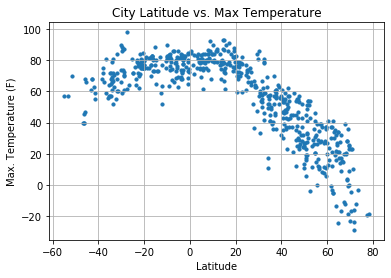

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

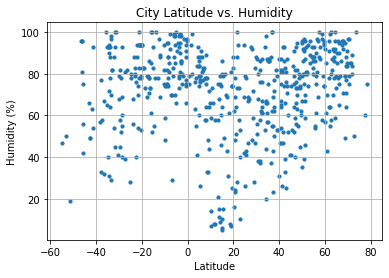

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

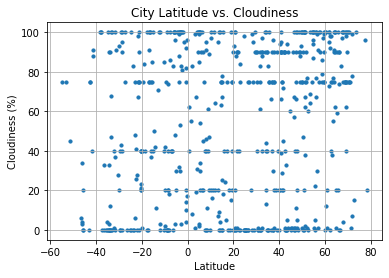

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

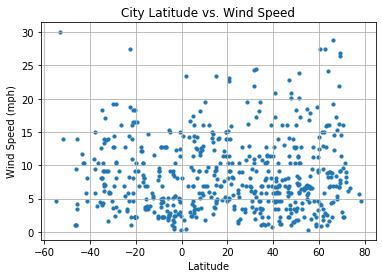

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

## Linear Regression

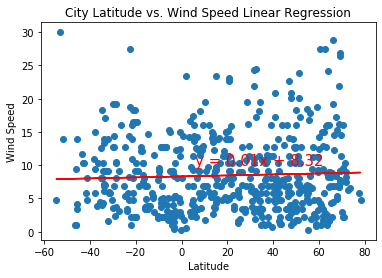

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots - ( Activities 8 Matplotlib ins)

# Add the linear regression equation and line to plot
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("City Latitude vs. Wind Speed Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("Linear Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()